# Simulasi Tali

Bayangin kalau tali itu beban-beban yang dihubungkan bersama dengan tali tak bermassa. Kayak gini kira-kira



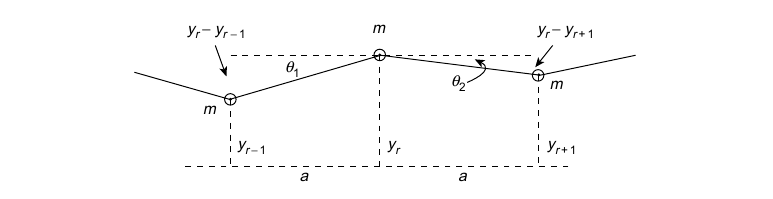

Displacements of three masses on a loaded string under tension T. Sourced from [1, p. 91].

Tali tak bermassa tersebut memiliki tegangan tali yang menarik beban-beban yang diikatnya. Kalau kita tinjau dari gambarnya, komponen tegangan di sumbu x dan y untuk tarikan dengan massa yang dikiri adalah $-T\cos{\theta_1}$ karena mengarah ke kiri dan $-T\sin{\theta_1}$ karena mengarah ke bawah. Sama dengan yang di kanan, komponen tegangan di sumbu x dan y-nya adalah $T\cos{\theta_2}$ karena mengarah ke kanan dan $-T\sin{\theta_2}$ karena mengarah ke bawah.




## sin, cos, dan tan dengan sudut kecil

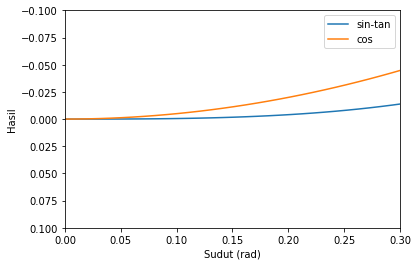

In [79]:
import matplotlib.pyplot as plt
import numpy as np

rad = np.linspace(0, 1, 100)

plt.plot(rad, np.sin(rad)-np.tan(rad), label="sin-tan")
plt.plot(rad, np.cos(rad)-1, label="cos")
plt.xlabel("Sudut (rad)")
plt.ylabel("Hasil")
plt.xlim(0, 0.3)
plt.ylim(0.1,-0.1)
plt.legend()
plt.show()

Di sini kalau kita misalkan sudut $\theta_1$ dan $\theta_2$ kecil, bisa dibilang kalau $\cos{\theta_1} = \cos{\theta_2}$, jadi total gaya di sumbu x adalah

$$-T\cos{\theta_1} + T\cos{\theta_2} = 0$$

In [80]:
"""
Jika sudut sebelum terlalu berbeda hasilnya sekitar 0.3 radian dengan hasil 
sekitar 0.3, 

(y_r - y_{r-1})/a <= 0.3
"""

'\nJika sudut sebelum terlalu berbeda hasilnya sekitar 0.3 radian dengan hasil \nsekitar 0.3, \n\n(y_r - y_{r-1})/a <= 0.3\n'

Selanjutnya untuk di sumbu y, kalau sudutnya kecil, $\sin{\theta} = \tan{\theta}$. Sehingga, 

$$\sin{\theta_1} = \tan{\theta_1} = \frac{y_r-y_{r-1}}{a}$$
dan
$$\sin{\theta_2} = \tan{\theta_2} = \frac{y_r-y_{r+1}}{a}$$

Jadi, total gaya di sumbu y adalah 

$$-T(\sin{\theta_1} + \sin{\theta_2}) = -\frac{T}{a}(-y_{r-1} + 2y_r-y_{r+1})$$
$$F = \frac{T}{a}(y_{r-1} - 2y_r + y_{r+1})$$

Kita buat menjadi persamaan differensial dan kita dapatkan
$$m\ddot{y} = \frac{T}{a}(y_{r-1} - 2y_r + y_{r+1})$$
$$\ddot{y} = \frac{T}{ma}(y_{r-1} - 2y_r + y_{r+1})$$

## Simulasi tali untuk 4 beban

Buat nyelesain persamaan PDB ini aku bakal pakai SciPy, kalau sudah pernah ngeliat video Gravitational Slingshot harusnya sudah tau gimana caranya. Buat yang belum, kita coba simulasiin empat beban untuk tali kita.

Yang kita tahu di sistem ini cuma posisi awal dan kecepatan awalnya. Kita tau kalau turunan dari posisi itu kecepatan, jadi
$$\dot{y}_r = \frac{dy}{dt} = v$$
karena ada nilainya diketahui dari kecepatan awal, tidak perlu pakai fungsi. Untuk turunan kecepatan kita tahu itu adalah percepatan dan percepatannya sudah kita dapatkan rumusnya sebelumnya yang 
$$\ddot{y}_r = \frac{d^2y}{dt^2} = \frac{T}{ma}(y_{r-1} - 2y_r + y_{r+1})$$

Sekarang, misalkan ada tali yang beratnya 1.5 kg dengan panjang 2 meter. Buat tegangan antar bebannya kita asumsikan 1 Newton aja.

In [99]:
T = 1 # N
m = 1.5/4 # 1 beban berarti beratnya 1.5/4 kg karena ada 4 beban
a = 2/4 # jarak antara bebannya berarti 2/4 kg karena ada 4 beban

Untuk ke SciPynya kita buat fungsi `diff` yang isinya persamaan differensial kita.

In [100]:
def diff(t, y):
    yp = np.zeros(4*2) # 4 untuk jumlah bola, 2 kali lipat karena ada turunan pertama dan keduanya

    # Bola pertama
    yp[0] = y[1]
    yp[1] = T/(m*a)*(y[-2] - 2*y[0] + y[2])

    # Bola kedua
    yp[2] = y[3]
    yp[3] = T/(m*a)*(y[0] - 2*y[2] + y[4])

    # Bola ketiga
    yp[4] = y[5]
    yp[5] = T/(m*a)*(y[2] - 2*y[4] + y[6])

    # Bola keempat
    yp[6] = y[7]
    yp[7] = T/(m*a)*(y[4] - 2*y[6] + y[8])

Biar gak capek-capek nulis kalau misalnya mau ada banyak bola, kita pakai `for` untuk generalisasi.

In [101]:
def diff(t, y):
    yp = np.zeros(4*2)

    for i in range(4*2):
        yp[i] = y[i+1]
        yp[i+1] = T/(m*a)*(y[i-2] - 2*y[i] + y[i+2])

    return yp 

Biar persamaan differensialnya bisa terselesaikan, andaikan bola di ujung kiri dan kanan diikat, jadi tidak bergerak. Turunan posisi dan turunan kecepatan untuk bola pertama dan bola akhir harus nol

In [102]:
def diff(t, y):
    yp = np.zeros(4*2)

    for i in range(0, 4*2-2, 2):
        yp[i] = y[i+1]
        yp[i+1] = T/(m*a)*(y[i-2] - 2*y[i] + y[i+2])

    yp[0] = 0
    yp[1] = 0
    yp[-1] = 0
    yp[-2] = 0

    return yp 

Selanjutnya ke penyelesaiannya. Pertama kita import dulu solve_ivp dari SciPy. Lalu kita buat array inits untuk nyimpan nilai posisi dan kecepatan awal, untuk sementara isinya 0 semua. Kita coba simulasikan dari 0 sampai 5 detik. 

In [103]:
from scipy.integrate import solve_ivp

time = 5
inits = np.zeros(4*2)

inits[0] = 0
inits[-2] = 0

sol = solve_ivp(
    diff, 
    [0, time], 
    inits,
    dense_output=True, 
    rtol=1e-8
)

t = np.linspace(0, time, 100)
y = sol.sol(t)

Mari kita coba lihat hasil kita

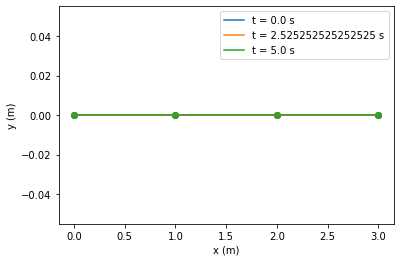

In [104]:
for i in range(0, 4*2, 2):
    plt.plot(a*i, y[i, 0], marker="o", color="tab:blue")
    plt.plot(a*i, y[i, 50], marker="o", color="tab:orange")
    plt.plot(a*i, y[i, 99], marker="o", color="tab:green")

plt.plot([a*i for i in range(0, 4*2, 2)], y[[i for i in range(0, 4*2, 2)], 0], color="tab:blue", label=f"t = {t[0]} s")
plt.plot([a*i for i in range(0, 4*2, 2)], y[[i for i in range(0, 4*2, 2)], 50], color="tab:orange", label=f"t = {t[50]} s")
plt.plot([a*i for i in range(0, 4*2, 2)], y[[i for i in range(0, 4*2, 2)], 99], color="tab:green", label=f"t = {t[99]} s")

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.show()

Kalau kita lihat, tidak ada perbedaan antara ketiga plot yang kita buat. Coba kita ganti nilai posisi awalnya.

In [105]:
from scipy.integrate import solve_ivp

time = 5
inits = np.zeros(4*2)

# Ubah bola kedua jadi di y = 0.5
inits[2] = 0.5

inits[0] = 0
inits[-2] = 0

sol = solve_ivp(
    diff, 
    [0, time], 
    inits,
    dense_output=True, 
    rtol=1e-8
)

t = np.linspace(0, time, 100)
y = sol.sol(t)

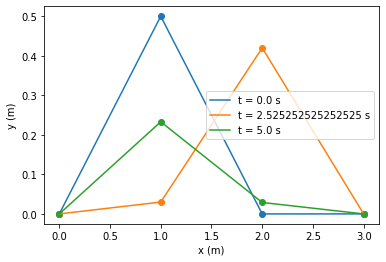

In [106]:
for i in range(0, 4*2, 2):
    plt.plot(a*i, y[i, 0], marker="o", color="tab:blue")
    plt.plot(a*i, y[i, 50], marker="o", color="tab:orange")
    plt.plot(a*i, y[i, 99], marker="o", color="tab:green")

plt.plot([a*i for i in range(0, 4*2, 2)], y[[i for i in range(0, 4*2, 2)], 0], color="tab:blue", label=f"t = {t[0]} s")
plt.plot([a*i for i in range(0, 4*2, 2)], y[[i for i in range(0, 4*2, 2)], 50], color="tab:orange", label=f"t = {t[50]} s")
plt.plot([a*i for i in range(0, 4*2, 2)], y[[i for i in range(0, 4*2, 2)], 99], color="tab:green", label=f"t = {t[99]} s")

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.show()

Hasilnya beda-beda, tapi kurang kelihatan apa yang sebenarnya terjadi. Biar lebih keliatan, kita buat jadi animasi.

In [107]:
from matplotlib import animation, rc
rc('animation', html='html5')

fig, ax = plt.subplots()
plt.close()

ax.set_xlim(0, a*(4-1))
ax.set_ylim(-1, 1)

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

loads = []

for i in range(4):
    loads.append(ax.plot([], [], color="cornflowerblue", marker="o"))

text = ax.text(0.5, 0.5, 0, fontsize=12)
lines, = ax.plot([], [], color="orange")


def animate(i):
    text.set_text(f"{round(t[i], 2)} s")
    for j in range(4):
        loads[j][0].set_data([a*j, y[j*2][i]])
    
    ass = [a*j for j in range(4)]
    yss = [y[j*2][i] for j in range(4)]

    lines.set_data([ass, yss])
    returns = loads + [lines]

    return tuple(returns)

# Comment kalau mau save animasi
anim = animation.FuncAnimation(fig, animate, frames=len(y[0]), blit=False, interval=1/24*1000)
#anim.save('string_sim.gif', writer='imagemagick', extra_args="convert")
anim

Tadaa, simulasi tali kalau cuma ada 4 beban. 

## Simulasi tali untuk berapapun beban

Sekarang kita coba modifikasi kode kita supaya bisa simulasiin berapapun beban. Pertama kita buat variabel yang isinya jumlah beban yang mau digunakan.

In [90]:
n_beban = 4

Selanjutnya adalah keperluan persamaan differensialnya, tegangan tali $T$, massa masing-masing beban $m$, dan jarak antara beban $a$.

In [91]:
T = 1 # N
m = 1.5/n_beban # kg
a = 2/n_beban # m

In [92]:
def diff(t, y):
    yp = np.zeros(n_beban*2)

    for i in range(0, n_beban*2-2, 2):
        yp[i] = y[i+1]
        yp[i+1] = T/(m*a)*(y[i-2] - 2*y[i] + y[i+2])

    yp[0] = 0
    yp[1] = 0
    yp[-1] = 0
    yp[-2] = 0

    return yp 

In [93]:
from scipy.integrate import solve_ivp

time = 5
inits = np.zeros(n_beban*2)

inits[2] = 0.5

inits[0] = 0
inits[-2] = 0

sol = solve_ivp(
    diff, 
    [0, time], 
    inits,
    dense_output=True, 
    rtol=1e-8
)

t = np.linspace(0, time, 100)
y = sol.sol(t)

In [94]:
from matplotlib import animation, rc
rc('animation', html='html5')

n_beban

fig, ax = plt.subplots()
plt.close()

ax.set_xlim(0, a*(n_beban-1))
ax.set_ylim(-1, 1)

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

loads = []

for i in range(n_beban):
    loads.append(ax.plot([], [], color="cornflowerblue", marker="o"))

text = ax.text(0.5, 0.5, 0, fontsize=12)
lines, = ax.plot([], [], color="orange")


def animate(i):
    text.set_text(f"{round(t[i], 2)} s")
    for j in range(n_beban):
        loads[j][0].set_data([a*j, y[j*2][i]])
    
    ass = [a*j for j in range(n_beban)]
    yss = [y[j*2][i] for j in range(n_beban)]

    lines.set_data([ass, yss])
    returns = loads + [lines]

    return tuple(returns)

# Comment kalau mau save animasi
anim = animation.FuncAnimation(fig, animate, frames=len(y[0]), blit=False, interval=1/24*1000)
#anim.save('string_sim.gif', writer='imagemagick', extra_args="convert")
anim

## Simulasi tali untuk 100 beban

In [95]:
n_beban = 100

T = 1 # N
m = 1.5/n_beban # kg
a = 2/n_beban # m

def diff(t, y):
    yp = np.zeros(n_beban*2)

    for i in range(0, n_beban*2-2, 2):
        yp[i] = y[i+1]
        yp[i+1] = T/(m*a)*(y[i-2] - 2*y[i] + y[i+2])

    yp[0] = 0
    yp[1] = 0
    yp[-1] = 0
    yp[-2] = 0

    return yp 

from scipy.integrate import solve_ivp

time = 5
inits = np.zeros(n_beban*2)

inits[2] = 1

inits[0] = 0
inits[-2] = 0

sol = solve_ivp(
    diff, 
    [0, time], 
    inits,
    dense_output=True, 
    rtol=1e-8
)

t = np.linspace(0, time, 100)
y = sol.sol(t)

from matplotlib import animation, rc
rc('animation', html='html5')

n_beban

fig, ax = plt.subplots()
plt.close()

ax.set_xlim(0, a*(n_beban-1))
ax.set_ylim(-1, 1)

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

loads = []

for i in range(n_beban):
    loads.append(ax.plot([], [], color="cornflowerblue", marker="o"))

text = ax.text(0.5, 0.5, 0, fontsize=12)
lines, = ax.plot([], [], color="orange")


def animate(i):
    text.set_text(f"{round(t[i], 2)} s")
    for j in range(n_beban):
        loads[j][0].set_data([a*j, y[j*2][i]])
    
    ass = [a*j for j in range(n_beban)]
    yss = [y[j*2][i] for j in range(n_beban)]

    lines.set_data([ass, yss])
    returns = loads + [lines]

    return tuple(returns)

# Comment kalau mau save animasi
anim = animation.FuncAnimation(fig, animate, frames=len(y[0]), blit=False, interval=1/24*1000)
#anim.save('string_sim.gif', writer='imagemagick', extra_args="convert")
anim

## Having Fun

### Gelombang berdiri
 

In [96]:
n_beban = 100

T = 1 # N
m = 1.5/n_beban # kg
a = 2/n_beban # m

def diff(t, y):
    yp = np.zeros(n_beban*2)

    for i in range(0, n_beban*2-2, 2):
        yp[i] = y[i+1]
        yp[i+1] = T/(m*a)*(y[i-2] - 2*y[i] + y[i+2])

    yp[0] = 0
    yp[1] = 0
    yp[-1] = 0
    yp[-2] = 0

    return yp 

from scipy.integrate import solve_ivp

time = 5
inits = np.zeros(n_beban*2)

for i in range(0, n_beban*2, 2):
    inits[i] = np.sin(np.pi/n_beban*i)

inits[0] = 0
inits[-2] = 0

sol = solve_ivp(
    diff, 
    [0, time], 
    inits,
    dense_output=True, 
    rtol=1e-8
)

t = np.linspace(0, time, 100)
y = sol.sol(t)

from matplotlib import animation, rc
rc('animation', html='html5')

n_beban

fig, ax = plt.subplots()
plt.close()

ax.set_xlim(0, a*(n_beban-1))
ax.set_ylim(-1, 1)

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

loads = []

for i in range(n_beban):
    loads.append(ax.plot([], [], color="cornflowerblue", marker="o"))

text = ax.text(0.5, 0.5, 0, fontsize=12)
lines, = ax.plot([], [], color="orange")


def animate(i):
    text.set_text(f"{round(t[i], 2)} s")
    for j in range(n_beban):
        loads[j][0].set_data([a*j, y[j*2][i]])
    
    ass = [a*j for j in range(n_beban)]
    yss = [y[j*2][i] for j in range(n_beban)]

    lines.set_data([ass, yss])
    returns = loads + [lines]

    return tuple(returns)

# Comment kalau mau save animasi
anim = animation.FuncAnimation(fig, animate, frames=len(y[0]), blit=False, interval=1/24*1000)
#anim.save('string_sim.gif', writer='imagemagick', extra_args="convert")
anim

### Petik gitar

In [97]:
n_beban = 100

T = 1 # N
m = 1.5/n_beban # kg
a = 2/n_beban # m

def diff(t, y):
    yp = np.zeros(n_beban*2)

    for i in range(0, n_beban*2-2, 2):
        yp[i] = y[i+1]
        yp[i+1] = T/(m*a)*(y[i-2] - 2*y[i] + y[i+2])

    yp[0] = 0
    yp[1] = 0
    yp[-1] = 0
    yp[-2] = 0

    return yp 

from scipy.integrate import solve_ivp

time = 5
inits = np.zeros(n_beban*2)

for i in range(n_beban):
    if i <= n_beban//4:
        inits[i*2] = (i/(n_beban)*2)
    else:
        inits[i*2] = ((-i/(n_beban)/3*2+2/3))

inits[0] = 0
inits[-2] = 0

sol = solve_ivp(
    diff, 
    [0, time], 
    inits,
    dense_output=True, 
    rtol=1e-8
)

t = np.linspace(0, time, 100)
y = sol.sol(t)

from matplotlib import animation, rc
rc('animation', html='html5')

n_beban

fig, ax = plt.subplots()
plt.close()

ax.set_xlim(0, a*(n_beban-1))
ax.set_ylim(-1, 1)

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

loads = []

for i in range(n_beban):
    loads.append(ax.plot([], [], color="cornflowerblue", marker="o"))

text = ax.text(0.5, 0.5, 0, fontsize=12)
lines, = ax.plot([], [], color="orange")


def animate(i):
    text.set_text(f"{round(t[i], 2)} s")
    for j in range(n_beban):
        loads[j][0].set_data([a*j, y[j*2][i]])
    
    ass = [a*j for j in range(n_beban)]
    yss = [y[j*2][i] for j in range(n_beban)]

    lines.set_data([ass, yss])
    returns = loads + [lines]

    return tuple(returns)

# Comment kalau mau save animasi
anim = animation.FuncAnimation(fig, animate, frames=len(y[0]), blit=False, interval=1/24*1000)
#anim.save('string_sim.gif', writer='imagemagick', extra_args="convert")
anim

### Karet?

In [98]:
n_beban = 100

T = 10 # N
m = 1.5/n_beban # kg
a = 2/n_beban # m

def diff2(t, y):
    yp = np.zeros(n_beban*2)

    for i in range(0, n_beban*2-2, 2):
        yp[i] = y[i+1]
        yp[i+1] = T/(m*a)*(y[i-2] - 2*y[i] + y[i+2]) - 0.01/m*y[i+1]

    yp[0] = 0
    yp[1] = 0
    yp[-1] = 0
    yp[-2] = 0

    return yp 

from scipy.integrate import solve_ivp

time = 10
inits = np.zeros(n_beban*2)

for i in range(0, n_beban*2, 2):
    inits[i] = np.sin(np.pi/2/n_beban*i)*0.25

inits[0] = 0
inits[-2] = 0

sol = solve_ivp(
    diff2, 
    [0, time], 
    inits,
    dense_output=True, 
    rtol=1e-8
)

t = np.linspace(0, time, 100)
y = sol.sol(t)

from matplotlib import animation, rc
rc('animation', html='html5')

n_beban

fig, ax = plt.subplots()
plt.close()

ax.set_xlim(0, a*(n_beban-1))
ax.set_ylim(-1, 1)

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

loads = []

for i in range(n_beban):
    loads.append(ax.plot([], [], color="cornflowerblue", marker="o"))

text = ax.text(0.5, 0.5, 0, fontsize=12)
lines, = ax.plot([], [], color="orange")


def animate(i):
    text.set_text(f"{round(t[i], 2)} s")
    for j in range(n_beban):
        loads[j][0].set_data([a*j, y[j*2][i]])
    
    ass = [a*j for j in range(n_beban)]
    yss = [y[j*2][i] for j in range(n_beban)]

    lines.set_data([ass, yss])
    returns = loads + [lines]

    return tuple(returns)

# Comment kalau mau save animasi
anim = animation.FuncAnimation(fig, animate, frames=len(y[0]), blit=False, interval=1/24*1000)
#anim.save('string_sim.gif', writer='imagemagick', extra_args="convert")
anim